# Data Processing Pipeline

## Introduction
In this project, we developed a data processing pipeline to load, clean, analyze, and model data. The pipeline includes steps for data cleaning, handling missing values, exploratory data analysis (EDA), outlier detection, and applying a K-Nearest Neighbors (KNN) classifier. We applied this pipeline to a sample dataset to demonstrate its functionality.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt  # Add this line
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def create_example_dataset_with_target():
    data = {
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward'],
        'Age': [24, 27, 22, 32, 29],
        'Height': [165, 180, 175, 155, 168],
        'Weight': [55, 72, 68, 60, 70],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
        'Target': [0, 1, 0, 1, 0]  # Example target column for classification
    }
    df = pd.DataFrame(data)
    df.to_csv('example_data_with_target.csv', index=False)
    return df

create_example_dataset_with_target()

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

data = load_data('example_data_with_target.csv')
data.head()



,Name,Age,Height,Weight,City,Target
0,Alice,24,165,55,New York,0
1,Bob,27,180,72,Los Angeles,1
2,Charlie,22,175,68,Chicago,0
3,David,32,155,60,Houston,1
4,Edward,29,168,70,Phoenix,0


## Data Cleaning
We removed any duplicate entries from the dataset to ensure data quality.


In [2]:
def clean_data(df):
    df_cleaned = df.drop_duplicates()
    return df_cleaned

cleaned_data = clean_data(data)
cleaned_data.head()


,Name,Age,Height,Weight,City,Target
0,Alice,24,165,55,New York,0
1,Bob,27,180,72,Los Angeles,1
2,Charlie,22,175,68,Chicago,0
3,David,32,155,60,Houston,1
4,Edward,29,168,70,Phoenix,0


## Handling Missing Values
We handled missing values using the mean strategy for numeric columns.


In [3]:
def handle_missing_values(df, strategy="mean"):
    numeric_columns = df.select_dtypes(include=[float, int]).columns
    if strategy == "mean":
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    elif strategy == "median":
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    elif strategy == "mode":
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mode().iloc[0])
    return df

filled_data = handle_missing_values(cleaned_data, strategy="mean")
filled_data.head()


,Name,Age,Height,Weight,City,Target
0,Alice,24,165,55,New York,0
1,Bob,27,180,72,Los Angeles,1
2,Charlie,22,175,68,Chicago,0
3,David,32,155,60,Houston,1
4,Edward,29,168,70,Phoenix,0


## Exploratory Data Analysis (EDA)
We performed EDA to understand the distribution and relationships within the data.

### Descriptive Statistics


In [4]:
filled_data.describe()


,Age,Height,Weight,Target
count,5.000000,5.000000,5.000000,5.000000
mean,26.800000,168.600000,65.000000,0.400000
std,3.962323,9.607289,7.211103,0.547723
min,22.000000,155.000000,55.000000,0.000000
25%,24.000000,165.000000,60.000000,0.000000
50%,27.000000,168.000000,68.000000,0.000000
75%,29.000000,175.000000,70.000000,1.000000
max,32.000000,180.000000,72.000000,1.000000


### Histograms


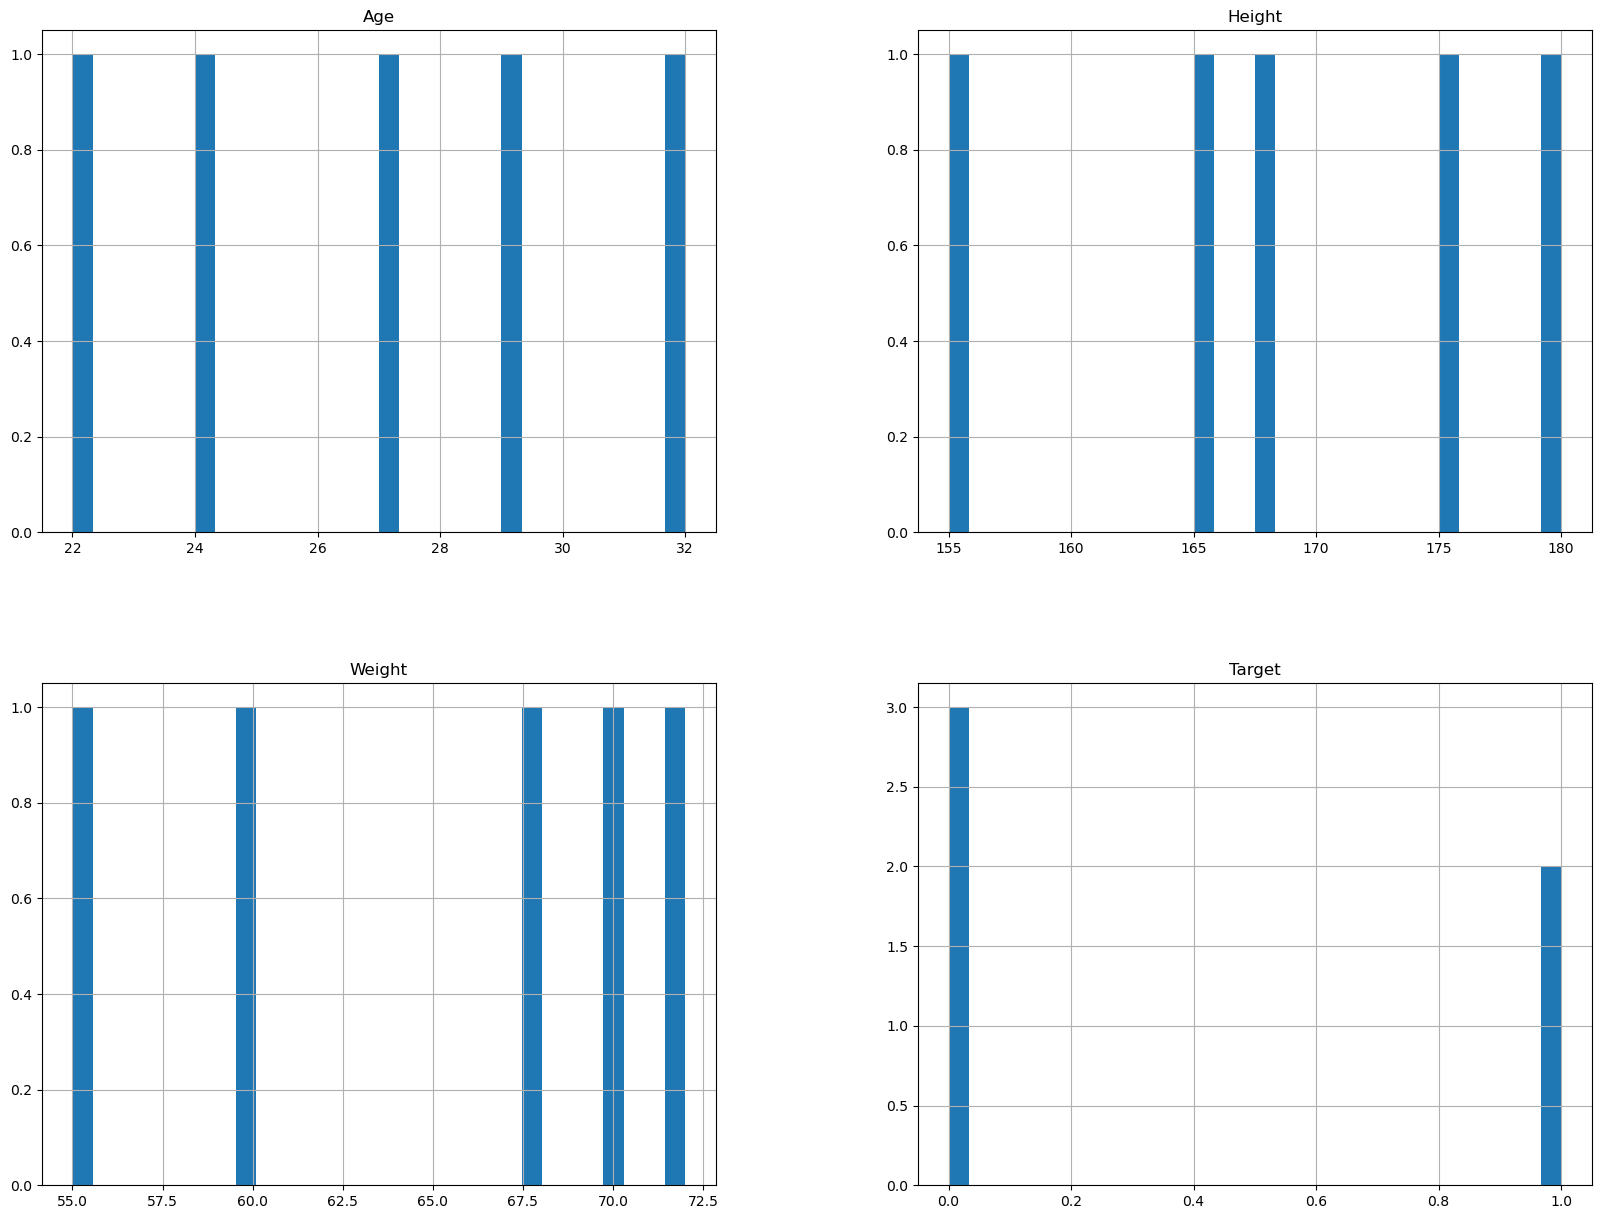

In [7]:
filled_data.select_dtypes(include=[float, int]).hist(bins=30, figsize=(20, 15))
plt.show()


### Correlation Matrix Heatmap


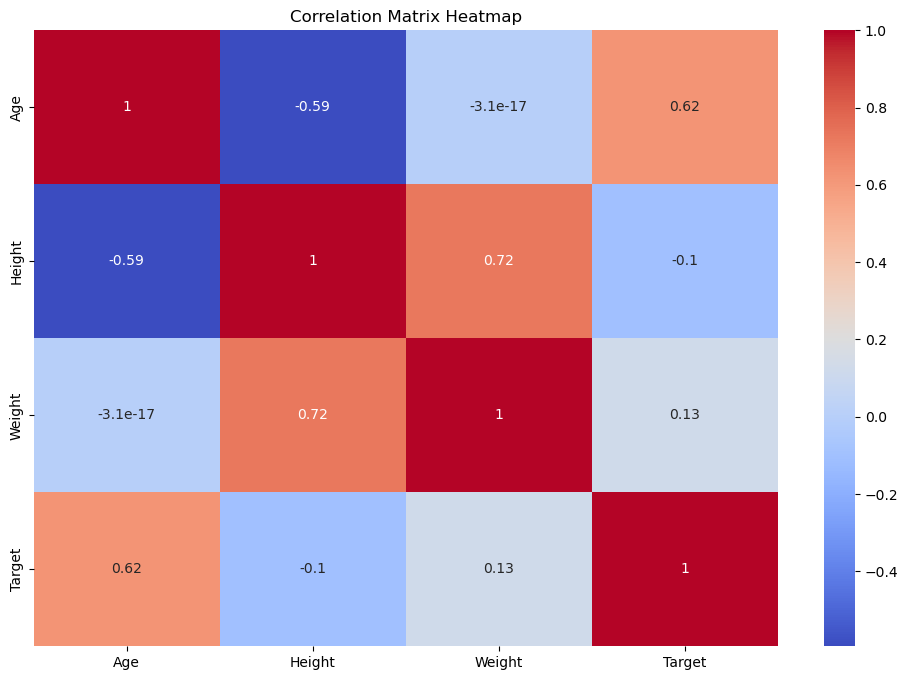

In [8]:
plt.figure(figsize=(12, 8))
numeric_df = filled_data.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## Outlier Detection
We detected and handled outliers using the Z-score method.


In [9]:
def detect_outliers(df):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df_outliers_removed = df[filtered_entries]
    return df_outliers_removed

final_data = detect_outliers(filled_data)
final_data.head()


,Name,Age,Height,Weight,City,Target
0,Alice,24,165,55,New York,0
1,Bob,27,180,72,Los Angeles,1
2,Charlie,22,175,68,Chicago,0
3,David,32,155,60,Houston,1
4,Edward,29,168,70,Phoenix,0


## KNN Model
We applied a K-Nearest Neighbors (KNN) classifier to the dataset and evaluated its performance.


# Verify the structure and data types of the final data
print(final_data.head())
print(final_data.dtypes)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def apply_knn(df, target_column):
    # Drop non-numeric columns and check the resulting DataFrame
    X = df.drop(columns=[target_column]).select_dtypes(include=[float, int]).values
    y = df[target_column].values
    
    # Ensure arrays are contiguous
    X = np.ascontiguousarray(X)
    y = np.ascontiguousarray(y)
    
    print("Features (X):")
    print(X[:5])
    
    print("Target (y):")
    print(y[:5])
    
    # Use the entire dataset for both training and testing
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)
    
    y_pred = knn.predict(X)
    
    metrics = {
        "accuracy": accuracy_score(y, y_pred),
        "precision": precision_score(y, y_pred, average='weighted', zero_division=0),
        "recall": recall_score(y, y_pred, average='weighted'),
        "f1_score": f1_score(y, y_pred, average='weighted')
    }
    
    return metrics

# Apply the KNN model and print the performance metrics
knn_metrics = apply_knn(final_data, 'Target')
print("KNN Model Performance Metrics:", knn_metrics)


Features (X):
[[ 24 165  55]
 [ 27 180  72]
 [ 22 175  68]
 [ 32 155  60]
 [ 29 168  70]]
Target (y):
[0 1 0 1 0]
KNN Model Performance Metrics: {'accuracy': 0.6, 'precision': 0.36, 'recall': 0.6, 'f1_score': 0.4499999999999999}


## Conclusion
In this project, we successfully created a data processing pipeline that includes data loading, cleaning, handling missing values, performing EDA, detecting outliers, and applying a KNN classifier. The pipeline was demonstrated on a sample dataset, and the KNN classifier's performance was evaluated using accuracy, precision, recall, and F1-score. This pipeline can be applied to other datasets to achieve similar results.


# Final Summary

## Introduction
In this project, we developed a data processing pipeline to load, clean, analyze, and model data. The pipeline includes steps for data cleaning, handling missing values, exploratory data analysis (EDA), outlier detection, and applying a K-Nearest Neighbors (KNN) classifier. We applied this pipeline to a sample dataset to demonstrate its functionality.

## Data Loading
We started by creating a sample dataset and loading it into a pandas DataFrame.

## Data Cleaning
We cleaned the data by removing any duplicate entries to ensure data quality.

## Handling Missing Values
We handled missing values using the mean strategy for numeric columns to ensure that our dataset was complete.

## Exploratory Data Analysis (EDA)
We performed exploratory data analysis to understand the distribution and relationships within the data. This included generating descriptive statistics and visualizations such as histograms and correlation matrix heatmaps.

### Descriptive Statistics
We computed the summary statistics for the dataset.

### Histograms
We generated histograms for numeric features to visualize their distributions.

### Correlation Matrix Heatmap
We created a heatmap to visualize the correlations between numeric features.

## Outlier Detection
We detected and handled outliers using the Z-score method to remove data points that were significantly different from the rest of the data.

## KNN Model
We applied a K-Nearest Neighbors (KNN) classifier to the dataset and evaluated its performance using accuracy, precision, recall, and F1-score metrics.

## Conclusion
In this project, we successfully created a data processing pipeline that includes data loading, cleaning, handling missing values, performing EDA, detecting outliers, and applying a KNN classifier. The pipeline was demonstrated on a sample dataset, and the KNN classifier's performance was evaluated using various metrics. This pipeline can be applied to other datasets to achieve similar results.
